In [2]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1- Préparation du dataset

In [3]:
#import dataset
dataset = pd.read_csv(".././dataset/iris.csv")

In [4]:
#visualisation of my dataset
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Text(0, 0.5, 'sepal_width')

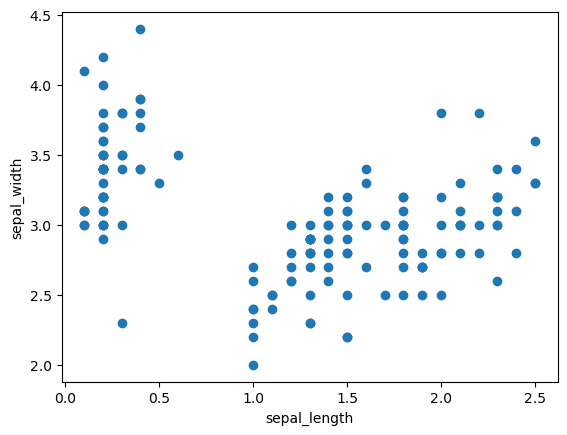

In [5]:
#Prédire la largeur de sépale en fonction de la longueur de pétale
petal_width = np.array(dataset["sepal_width"])
petal_length = np.array(dataset["petal_width"])

plt.scatter(petal_length,petal_width)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")

In [6]:
#reshape petal width value
y = petal_width.reshape(petal_width.shape[0], 1) # Target

#reshape petal length value to (150,1)
petal_length = petal_length.reshape(petal_length.shape[0],1)

In [73]:
#Try to put X to (150, 3)
x = petal_length
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))


In [74]:
#Visualise x
X   #features

array([[0.04, 0.2 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.16, 0.4 , 1.  ],
       [0.09, 0.3 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.01, 0.1 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.01, 0.1 , 1.  ],
       [0.01, 0.1 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.16, 0.4 , 1.  ],
       [0.16, 0.4 , 1.  ],
       [0.09, 0.3 , 1.  ],
       [0.09, 0.3 , 1.  ],
       [0.09, 0.3 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.16, 0.4 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.25, 0.5 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.16, 0.4 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.16, 0.4 , 1.  ],
       [0.01, 0.1 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.01, 0.1 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.04, 0.2 , 1.  ],
 

In [75]:
X.shape

(150, 3)

In [60]:
#Initialisation du vecteur theta avec 3 éléments
theta = np.random.randn(3,1)

In [61]:
#visualise theta
theta

array([[ 1.0432541 ],
       [-0.93926734],
       [ 0.37145158]])

2- Modèle polynomiale

In [62]:
#model function
def model(X,theta):
    return X.dot(theta)

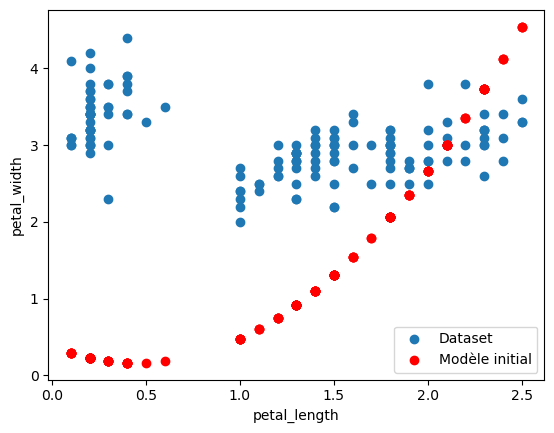

In [76]:
plt.scatter(petal_length, y, label ="Dataset")
plt.scatter(petal_length, model(X, theta), label="Modèle initial", c="r")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()
plt.show()

3- La fonction cout

In [77]:
def cost_function(X,y, theta):
    m = len(y)
    cost = (1/2*m)* np.sum((y - model(X,theta))**2)
    return cost

In [78]:
#Value of cost function
cost_function(X,y,theta)

53352.21381965796

4- Descent gradient

In [79]:
def grad(X,y,theta):
    m = len(y)
    grad = (1/m)* X.T.dot(model(X,theta)-y)
    return grad

In [80]:
def descent_gradient(X,y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0,n_iterations):
        theta = theta - learning_rate*grad(X,y,theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X,y,theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history
        

Phase d'entrainement

In [122]:
learning_rate = 0.15
n_iterations = 1000
theta_final, cost_history = descent_gradient(X,y,theta,learning_rate,n_iterations)

In [123]:
theta_final

array([[ 0.44427656],
       [-1.23150889],
       [ 3.6346426 ]])

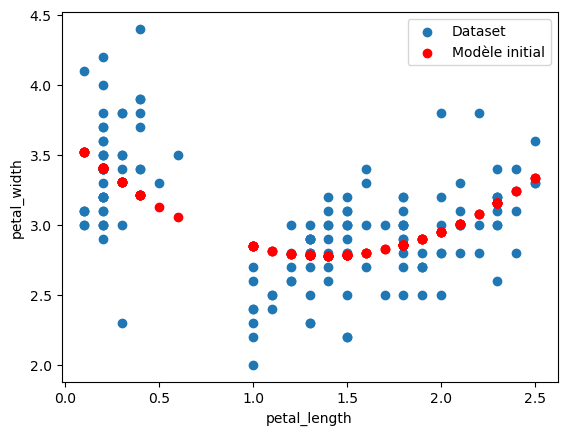

In [113]:
plt.scatter(petal_length, y, label ="Dataset")
plt.scatter(petal_length, model(X, theta_final), label="Modèle initial", c="r")
predictions = model(X, theta_final)
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()
plt.show()

Courbe d'apprentissage

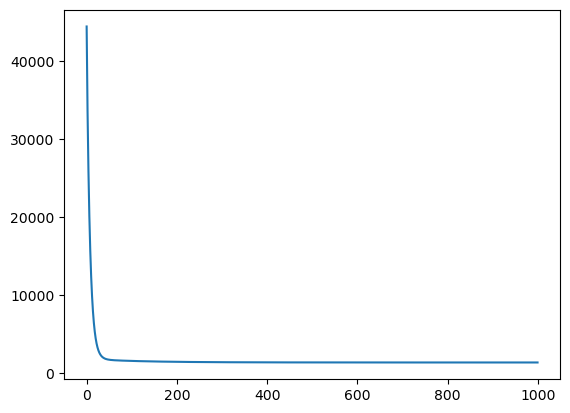

In [127]:
plt.plot(range(n_iterations), cost_history)
plt.show()

Coefficient de determaination

In [125]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [126]:
coef_determination(y, predictions)

0.36420034423673786